# Machine Learning with Iris dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [2]:
filename = 'iris.csv'
df = pd.read_csv(filename)

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
df['species'] = df['species'].astype('category')

In [5]:
df.dtypes

sepal_length     float64
sepal_width      float64
petal_length     float64
petal_width      float64
species         category
dtype: object

In [6]:
list(df['species'].unique())

['setosa', 'versicolor', 'virginica']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float64 
 1   sepal_width   150 non-null    float64 
 2   petal_length  150 non-null    float64 
 3   petal_width   150 non-null    float64 
 4   species       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


## Split in training en test datasets

In [8]:
from sklearn.model_selection import train_test_split

np.random.seed(1234)

In [9]:
df_train, df_test = train_test_split(df, test_size = 0.3)
df_test = df_test.copy()

In [10]:
print('df_train', df_train.shape)
print('df_test', df_test.shape)

df_train (105, 5)
df_test (45, 5)


## Identify features and target

In [11]:
feature_names = list(df.columns[:-1])
target_name = df.columns[-1]

In [12]:
print('features:', feature_names)
print('target:', target_name)

features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target: species


In [13]:
df_train_features = df_train[feature_names]
df_train_target = df_train[target_name]
df_test_features = df_test[feature_names]
df_test_target = df_test[target_name]

In [14]:
print('df_train_features', df_train_features.shape)
print('df_train_target', df_train_target.shape)
print('df_test_features', df_test_features.shape)
print('df_test_target', df_test_target.shape)

df_train_features (105, 4)
df_train_target (105,)
df_test_features (45, 4)
df_test_target (45,)


## Scale the numeric features

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [16]:
scaler = MinMaxScaler()

scaler.fit(df_train_features)

train_features_scaled = scaler.transform(df_train_features)
test_features_scaled = scaler.transform(df_test_features)

In [17]:
print('mean', round(train_features_scaled.mean(), 10))
print('std', train_features_scaled.std())
print('minimum', round(train_features_scaled.min(), 10))
print('maximum', round(train_features_scaled.max(), 10))


mean 0.4530560117
std 0.2636131452596513
minimum 0.0
maximum 1.0


### do it yourself

#### Min Max Scaler

In [18]:
minimum = df_train_features.min()
maximum = df_train_features.max()

train_features_scaled = (df_train_features - minimum) / (maximum - minimum)
test_features_scaled = (df_test_features - minimum) / (maximum - minimum)

#### Standard Scaler

In [19]:
mean = df_train_features.mean()
std = df_train_features.std()

train_features_scaled = (df_train_features - mean) / std
test_features_scaled = (df_test_features - mean) / std

## k-Nearest Neighbor

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn_classifier = KNeighborsClassifier(n_neighbors = 3)

knn_classifier.fit(df_train_features, df_train_target)

KNeighborsClassifier(n_neighbors=3)

In [22]:
df_test['3NN_predicted'] = knn_classifier.predict(df_test_features)
df_test['3NN_correct'] = df_test['3NN_predicted'] == df_test[target_name]

In [23]:
df_test['3NN_correct'].value_counts()

True     44
False     1
Name: 3NN_correct, dtype: int64

In [24]:
accuracy = df_test['3NN_correct'].sum() / df_test['3NN_correct'].count()
print(f'accuracy {round(accuracy * 100)}%')

accuracy 98%


## Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB

In [26]:
nb_classifier = GaussianNB()

nb_classifier.fit(df_train_features, df_train_target) 

GaussianNB()

In [27]:
df_test['NB_predicted']= nb_classifier.predict(df_test_features)

In [28]:
df_test['NB_correct'] = df_test['NB_predicted'] == df_test[target_name]

In [29]:
accuracy = df_test['3NN_correct'].sum() / df_test['3NN_correct'].count()
print(f'accuracy {round(accuracy * 100)}%')

accuracy 98%


## Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dt_classifier = DecisionTreeClassifier()

dt_classifier.fit(df_train_features, df_train_target)

DecisionTreeClassifier()

In [32]:
df_test['DT_predicted'] = dt_classifier.predict(df_test_features)

In [33]:
df_test['DT_correct'] = df_test['DT_predicted'] == df_test[target_name]

In [34]:
accuracy = df_test['DT_correct'].sum() / df_test['DT_correct'].count()
print(f'accuracy {round(accuracy * 100)}%')

accuracy 98%


In [35]:
from sklearn import tree

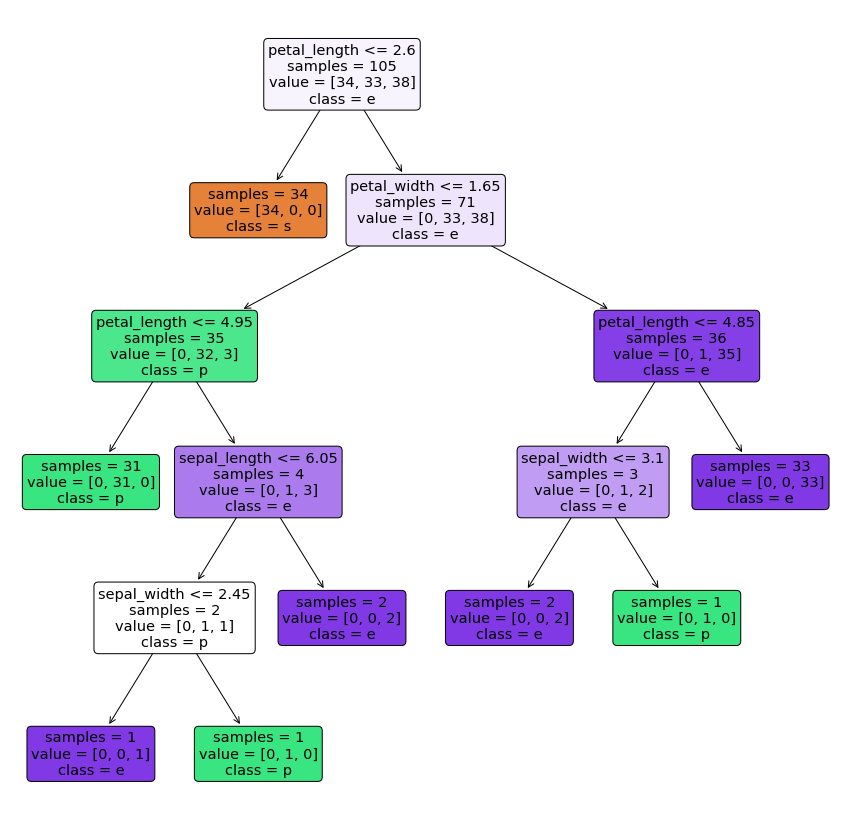

In [36]:
plt.figure(figsize = (15,15))

tree.plot_tree(dt_classifier, 
               feature_names = feature_names,
               class_names = target_name,
               filled = True,
               rounded = True, 
               impurity = False)

plt.show()

In [37]:
print('Feature Importances Decision Tree', dt_classifier.feature_importances_)

Feature Importances Decision Tree [0.00715649 0.03339695 0.56020346 0.3992431 ]


## Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf_classifier = RandomForestClassifier(n_estimators = 200)

rf_classifier.fit(df_train_features, df_train_target)

RandomForestClassifier(n_estimators=200)

In [40]:
df_test['RF_predicted'] = rf_classifier.predict(df_test_features)

In [41]:
df_test['RF_correct'] = df_test['RF_predicted'] == df_test[target_name]

In [42]:
accuracy = df_test['DT_correct'].sum() / df_test['DT_correct'].count()
print(f'accuracy {round(accuracy * 100)}%')

accuracy 98%


In [43]:
print('Feature Importances Random Forest', rf_classifier.feature_importances_)

Feature Importances Random Forest [0.08953151 0.02523057 0.46128311 0.42395481]


In [44]:
df_test

,sepal_length,sepal_width,petal_length,petal_width,species,3NN_predicted,3NN_correct,NB_predicted,NB_correct,DT_predicted,DT_correct,RF_predicted,RF_correct
91,6.1,3.0,4.6,1.4,versicolor,versicolor,True,versicolor,True,versicolor,True,versicolor,True
63,6.1,2.9,4.7,1.4,versicolor,versicolor,True,versicolor,True,versicolor,True,versicolor,True
103,6.3,2.9,5.6,1.8,virginica,virginica,True,virginica,True,virginica,True,virginica,True
6,4.6,3.4,1.4,0.3,setosa,setosa,True,setosa,True,setosa,True,setosa,True
59,5.2,2.7,3.9,1.4,versicolor,versicolor,True,versicolor,True,versicolor,True,versicolor,True
29,4.7,3.2,1.6,0.2,setosa,setosa,True,setosa,True,setosa,True,setosa,True
27,5.2,3.5,1.5,0.2,setosa,setosa,True,setosa,True,setosa,True,setosa,True
35,5.0,3.2,1.2,0.2,setosa,setosa,True,setosa,True,setosa,True,setosa,True
99,5.7,2.8,4.1,1.3,versicolor,versicolor,True,versicolor,True,versicolor,True,versicolor,True
122,7.7,2.8,6.7,2.0,virginica,virginica,True,virginica,True,virginica,True,virginica,True


## Support Vector Machine

In [45]:
from sklearn.svm import SVC

In [46]:
svm_classifier = SVC(kernel = 'rbf')

svm_classifier.fit(df_train_features, df_train_target)

SVC()

In [47]:
df_test['SVM_predicted'] = svm_classifier.predict(df_test_features)

In [48]:
df_test['SVM_correct'] = df_test['SVM_predicted'] == df_test[target_name]

In [49]:
accuracy = df_test['SVM_correct'].sum() / df_test['SVM_correct'].count()
print(f'accuracy {round(accuracy * 100)}%')

accuracy 98%


## Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
lr_classifier = LogisticRegression(random_state=0, max_iter=1000)

lr_classifier.fit(df_train_features, df_train_target)

LogisticRegression(max_iter=1000, random_state=0)

In [52]:
df_test['LR_predicted'] = svm_classifier.predict(df_test_features)

In [53]:
df_test['LR_correct'] = df_test['LR_predicted'] == df_test[target_name]

In [54]:
accuracy = df_test['LR_correct'].sum() / df_test['LR_correct'].count()
print(f'accuracy {round(accuracy * 100)}%')

accuracy 98%


In [55]:
(lr_classifier.predict_proba(df_test_features)*100).astype('int')

array([[ 0, 79, 19],
       [ 0, 74, 24],
       [ 0, 10, 89],
       [98,  1,  0],
       [ 6, 86,  6],
       [96,  3,  0],
       [96,  3,  0],
       [98,  1,  0],
       [ 3, 90,  6],
       [ 0,  0, 99],
       [ 4, 92,  2],
       [98,  1,  0],
       [ 0,  0, 99],
       [ 2, 86, 11],
       [96,  3,  0],
       [ 9, 89,  0],
       [ 0,  0, 99],
       [94,  5,  0],
       [ 0,  6, 93],
       [ 2, 88,  8],
       [ 1, 91,  6],
       [ 0, 78, 21],
       [ 0, 82, 16],
       [ 0, 83, 16],
       [ 0,  0, 99],
       [97,  2,  0],
       [ 0, 38, 61],
       [ 3, 93,  3],
       [ 0,  3, 96],
       [97,  2,  0],
       [32, 67,  0],
       [ 0, 44, 55],
       [98,  1,  0],
       [ 0, 47, 52],
       [ 0, 47, 52],
       [94,  5,  0],
       [97,  2,  0],
       [93,  6,  0],
       [99,  0,  0],
       [18, 81,  0],
       [97,  2,  0],
       [ 0, 76, 23],
       [98,  1,  0],
       [ 0, 13, 86],
       [ 0,  6, 93]])

## Neural Network - MLP Multi Layer Perceptron 

In [56]:
from sklearn.neural_network import MLPClassifier

In [57]:
mlp_classifier = MLPClassifier(solver='lbfgs',
                               activation='relu',     #'logistic',
                               alpha=1e-5,
                               hidden_layer_sizes=(5, 5), 
                               random_state=1,
                               max_iter=1000)

mlp_classifier.fit(df_train_features, df_train_target)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 5), max_iter=1000,
              random_state=1, solver='lbfgs')

In [58]:
df_test['MLP_predicted'] = mlp_classifier.predict(df_test_features)

In [59]:
df_test['MLP_correct'] = df_test['MLP_predicted'] == df_test[target_name]

In [60]:
accuracy = df_test['MLP_correct'].sum() / df_test['MLP_correct'].count()
print(f'accuracy {round(accuracy * 100)}%')

accuracy 96%


In [61]:
(mlp_classifier.predict_proba(df_test_features)*100).round()

array([[  0., 100.,   0.],
       [  0., 100.,   0.],
       [  0.,   0., 100.],
       [100.,   0.,   0.],
       [  0., 100.,   0.],
       [100.,   0.,   0.],
       [100.,   0.,   0.],
       [100.,   0.,   0.],
       [  0., 100.,   0.],
       [  0.,   0., 100.],
       [  0., 100.,   0.],
       [100.,   0.,   0.],
       [  0.,   0., 100.],
       [  0., 100.,   0.],
       [100.,   0.,   0.],
       [  0., 100.,   0.],
       [  0.,   0., 100.],
       [100.,   0.,   0.],
       [  0.,   0., 100.],
       [  0., 100.,   0.],
       [  0., 100.,   0.],
       [  0., 100.,   0.],
       [  0., 100.,   0.],
       [  0., 100.,   0.],
       [  0.,   0., 100.],
       [100.,   0.,   0.],
       [  0.,  40.,  60.],
       [  0., 100.,   0.],
       [  0.,   0., 100.],
       [100.,   0.,   0.],
       [  0., 100.,   0.],
       [  0.,  63.,  37.],
       [100.,   0.,   0.],
       [  0.,  73.,  27.],
       [  0.,  92.,   8.],
       [100.,   0.,   0.],
       [100.,   0.,   0.],
 

---
## Model Evaluation

In [62]:
import sklearn.metrics as sklm

## Confusion matrix

In [63]:
cm = sklm.confusion_matrix(df_test['species'], df_test['NB_predicted'])
cm

array([[16,  0,  0],
       [ 0, 16,  1],
       [ 0,  1, 11]])

## Accuracy

In [64]:
accuracy = sklm.accuracy_score(df_test['species'], df_test['NB_predicted'])
accuracy

0.9555555555555556

## Precision, Recall, F1

In [65]:
metrics = sklm.precision_recall_fscore_support(df_test['species'], df_test['NB_predicted'])

metrics

(array([1.        , 0.94117647, 0.91666667]),
 array([1.        , 0.94117647, 0.91666667]),
 array([1.        , 0.94117647, 0.91666667]),
 array([16, 17, 12]))

In [66]:
def print_metrics(actual, predicted):
    conf = sklm.confusion_matrix(actual, predicted)
    metrics = sklm.precision_recall_fscore_support(actual, predicted)
    print('Confusion matrix')
    print()
    print('                 Predicted Setosa    Predicted Versicolor     Predicted Virginica')
    print('Actual Setosa       %6d' % conf[0,0] + '               %5d' % conf[0,1] + '                    %5d' % conf[0,2])
    print('Actual Versicolor   %6d' % conf[1,0] + '               %5d' % conf[1,1] + '                    %5d' % conf[1,2])
    print('Actual Virginica    %6d' % conf[2,0] + '               %5d' % conf[2,1] + '                    %5d' % conf[2,2])
    print()
    print('Accuracy  %0.2f' % sklm.accuracy_score(actual, predicted))
    print()
    print('               Setosa        Versicolor         Virginica')
    print('Num case   %10d' % metrics[3][0] + '        %10d' % metrics[3][1]+ '        %10d' % metrics[3][2])
    print('Precision  %10.2f' % metrics[0][0] + '        %10.2f' % metrics[0][1] + '        %10.2f' % metrics[0][2])
    print('Recall     %10.2f' % metrics[1][0] + '        %10.2f' % metrics[1][1] + '        %10.2f' % metrics[1][2])
    print('F1         %10.2f' % metrics[2][0] + '        %10.2f' % metrics[2][1] + '        %10.2f' % metrics[2][2])

In [67]:
print('\n3-Nearest Neighbor **************************************************************\n')
print_metrics(df_test[target_name], df_test['3NN_predicted'])   

print('\nNaive Bayes *********************************************************************\n')
print_metrics(df_test[target_name], df_test['NB_predicted'])   

print('\nDecision Tree *******************************************************************\n')
print_metrics(df_test[target_name], df_test['DT_predicted'])   

print('\nRandom Forest *******************************************************************\n')
print_metrics(df_test[target_name], df_test['RF_predicted'])   

print('\nSupport Vector Machine ***********************************************************\n')
print_metrics(df_test[target_name], df_test['SVM_predicted'])   

print('\nLogistic Regression **************************************************************\n')
print_metrics(df_test[target_name], df_test['LR_predicted'])   


print('\nMulti-Layer Perceptron / Neural Network ******************************************\n')
print_metrics(df_test[target_name], df_test['MLP_predicted'])   


3-Nearest Neighbor **************************************************************

Confusion matrix

                 Predicted Setosa    Predicted Versicolor     Predicted Virginica
Actual Setosa           16                   0                        0
Actual Versicolor        0                  17                        0
Actual Virginica         0                   1                       11

Accuracy  0.98

               Setosa        Versicolor         Virginica
Num case           16                17                12
Precision        1.00              0.94              1.00
Recall           1.00              1.00              0.92
F1               1.00              0.97              0.96

Naive Bayes *********************************************************************

Confusion matrix

                 Predicted Setosa    Predicted Versicolor     Predicted Virginica
Actual Setosa           16                   0                        0
Actual Versicolor        0           

## Plots

In [68]:
def plot_iris_all(df, feature_columns, target_column, predicted_column):
    targets = sorted(df[target_column].unique())
    markers = {True:('.', 24, 1.0), False:('d', 80, 1.0)}
    cycle_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    colors = dict(zip(targets, cycle_colors[:len(targets)]))
    n = len(feature_columns)
    fig, axs = plt.subplots(n, n, sharex='col', sharey='row', figsize=(16, 16))
    for irow, row_feature in enumerate(feature_columns):
        for icol, col_feature in enumerate(feature_columns):
            if irow == icol:
                axs[irow, icol].set_visible(False) 
                axs[irow, icol].axis('off')
            else:
                for is_correct, m in markers.items():
                    for specie, c in colors.items():
                        if is_correct:
                            df_temp = df[(df[target_column] == df[predicted_column]) & (df[target_column] == specie)]
                        else:
                            df_temp = df[(df[target_column] != df[predicted_column]) & (df[target_column] == specie)]

                        sns.regplot(x = col_feature, 
                                    y = row_feature, 
                                    data = df_temp,  
                                    fit_reg = False, 
                                    marker = m[0],
                                    scatter_kws = {'color': c, 's': m[1], 'alpha':m[2]},
                                    ax = axs[irow, icol])

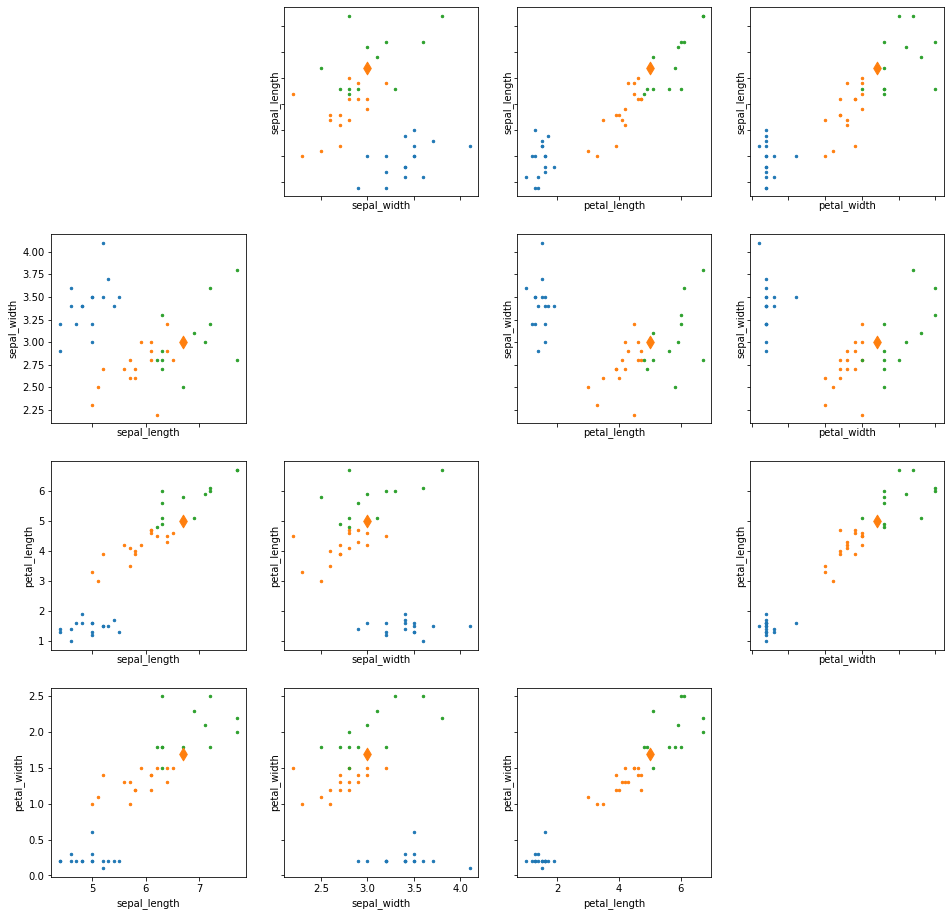

In [69]:
plot_iris_all(df_test, feature_names, target_name, 'DT_predicted')